# <center>Basic Feature Extraction</center>

Purpose of this notebook is to Engineer basic set of features before performing cleaning of the whole corpus. We will want to extract some basic features like count of Upper case words before performing data processing steps such as lower casing, etc.

In [ ]:
# import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [1]:
import os.path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from definitions import CLEANED_DATA_DIR, ROOT_DIR


## Sampling of data
Use only a sample of data to decide on steps to perform. 

In [11]:
# os.path.join(CLEANED_DATA_DIR, 'combined.csv')
from definitions import ROOT_DIR
# ROOT_DIR
# cleaned_data/combined.csv
CLEANED_DATA_DIR

'.\\cleaned_data'

In [13]:
file_name = str(os.path.join(CLEANED_DATA_DIR, 'combined.csv'))

data = pd.read_csv("../cleaned_data/combined.csv", encoding="utf-8")

print('Shape of the data:', data.shape)
print('-'*50)
print('Sampling 100k observations')
data = data.sample(n=100000)

Shape of the data: (2370450, 2)
--------------------------------------------------
Sampling 100k observations


## Basic Feature Extraction

https://towardsdatascience.com/how-i-improved-my-text-classification-model-with-feature-engineering-98fbe6c13ef3

In [15]:
data.head()

,message,label
712060,Please name and clarify those subsidies !\nAs ...,no_abuse
832870,Try telling that to the business that rely on ...,no_abuse
1097119,I'm not going to say anything for or against t...,abuse
1955973,"The OLD saying is, ""It pays to Read the FINE P...",no_abuse
339740,"Okay, when I lived in Barrow (1982-91) I heard...",no_abuse


In [31]:
data.label.value_counts()/data.shape[0] * 100

no_abuse    90.684
abuse        9.316
Name: label, dtype: float64

'I\'m not going to say anything for or against the president but I would just like to remind you that if Americans had not elected Trump then we would have hillary for 4 years or more. She is easily the most corrupt woman in the U S. It\'s more than apparent that people do not use their computers/phones to do simple research. Google hillary or bill and you will find a completely different world from the one you watch on CNN, MSNBC, CBS etc. I used to vote blindly BEFORE the internet. Now, I research who the people are that want me to vote them into office. You\'ve heard, "where there\'s smoke, there\'s fire?\nhttp://www.whatreallyhappened.com/WRHARTICLES/THE%20CLINTON%20BODY%20COUNT.pdf\nhttps://www.youtube.com/watch?v=NwkMfpge3gE'

### Word count

In [23]:
data['word_count'] = data.message.apply(lambda x: len(x.split()))

### Character Count

In [24]:
data['char_count'] = data.message.apply(lambda x: len(x))

### Average Word Length

In [19]:
def avg_word_len(document):
    '''
        - length of each word and sum them up
        - divide by number of words
    '''
    
    words = document.split()
    
    word_len = 0
    for word in words:
        word_len += len(word)
        
    return word_len / len(words)

In [25]:
data['avg_word_len'] = data.message.apply(avg_word_len)

### Upper Case Word Count

In [26]:
data['upper_case_words'] = data.message.apply(lambda x: len([word for word in x.split() if x.isupper()]))

### Numeric digit is present : Boolean

In [28]:
def is_number(x):
    '''
        Takes a word and checks if Number (Integer or Float)
    '''
    try:
        # only integers and float converts safely
        num = float(x)
        return True
    except ValueError as e: # not convertable to float
        return False

In [29]:
data['numeric_count'] = data.message.apply(lambda document: len([word for word in document.split() if is_number(word)]))

### Word Density - average length of the words

In [33]:
data['word_density'] = data['char_count'] / (data['word_count']+1)

### Punctuation count

In [34]:
punctuations = ['.',',', '"', "'", '-', '?', ':', '!', ';', '<<', '>>', '[', ']', '(', ')' , '{', '}']

In [35]:
data['punct_count'] = data.message.apply(lambda x: len([word for word in x.split() if word in punctuations]))

### Stop word count

In [ ]:
data[''] = 

### Number of unique words

In [ ]:
df['num_unique_words'] = df['comment_text'].apply(lambda x: len(set(w for w in x.split())))

### unique_words : word count Ratio

In [ ]:
df['unique_vs_words'] = df['num_unique_words'] / df['word_count']

# <center>Analysis</center>

In [3]:
# file_name = str(os.path.join(CLEANED_DATA_DIR, 'combined.csv'))

data = pd.read_csv("../cleaned_data/train_pre_clean_features.csv", encoding="utf-8")
data = data.sample(n=100000)
data = data.drop(columns=['message'])

In [4]:
data.label.value_counts(dropna=False)

no_abuse    90702
abuse        9298
Name: label, dtype: int64

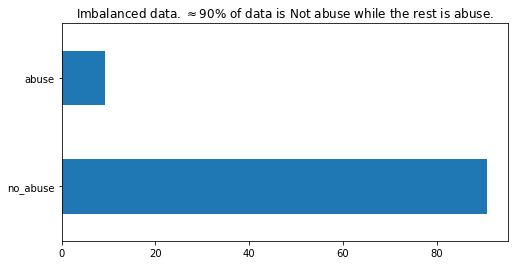

In [27]:
plt.figure(figsize=(8,4))
(data.label.value_counts()/data.shape[0]*100).plot(kind='barh')
plt.title(r'Imbalanced data. $\approx 90\%$ of data is Not abuse while the rest is abuse.')
plt.show()

In [5]:
data.columns

Index(['label', 'word_count', 'char_count', 'avg_word_len', 'upper_case_words',
       'numeric_count', 'word_density', 'punct_count', 'stop_word_count',
       'num_unique_words', 'unique_vs_words', 'be_verb_count'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1611671 to 972422
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   label             100000 non-null  object 
 1   word_count        100000 non-null  int64  
 2   char_count        100000 non-null  int64  
 3   avg_word_len      100000 non-null  float64
 4   upper_case_words  100000 non-null  int64  
 5   numeric_count     100000 non-null  int64  
 6   word_density      100000 non-null  float64
 7   punct_count       100000 non-null  int64  
 8   stop_word_count   100000 non-null  int64  
 9   num_unique_words  100000 non-null  int64  
 10  unique_vs_words   100000 non-null  float64
 11  be_verb_count     100000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 12.4+ MB


In [28]:
data.describe()

,word_count,char_count,avg_word_len,upper_case_words,numeric_count,word_density,punct_count,stop_word_count,num_unique_words,unique_vs_words,be_verb_count
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,53.12159,308.370900,4.997453,1.487670,0.229980,5.609856,0.264590,23.740380,41.774860,0.877566,4.40124
std,59.81842,348.676088,5.112565,12.740456,0.834803,3.374945,0.959985,26.863037,37.039613,0.107200,5.46353
min,1.00000,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000806,0.00000
25%,16.00000,92.000000,4.366945,0.000000,0.000000,5.120000,0.000000,6.000000,15.000000,0.800000,1.00000
50%,34.00000,198.000000,4.710526,1.000000,0.000000,5.515625,0.000000,15.000000,31.000000,0.890055,3.00000
75%,71.00000,412.000000,5.098361,2.000000,0.000000,5.888889,0.000000,32.000000,58.000000,1.000000,6.00000
max,2494.00000,10000.000000,1043.250000,2494.000000,56.000000,835.200000,91.000000,976.000000,747.000000,1.000000,301.00000


In [77]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

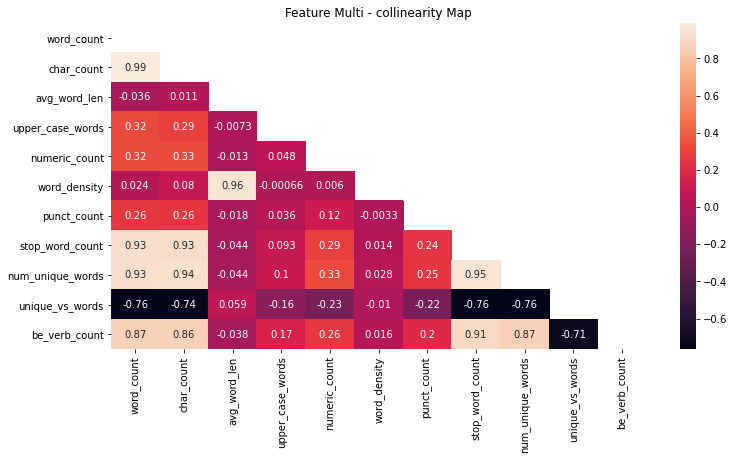

In [84]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, mask=mask)
plt.title('Feature Multi - collinearity Map')
plt.show()

## Features to retain
- Threshold  $= 0.85$
- notice correaltion
- perform t-test with target(label)
- more number of features a variable is correlated with gets higher priority to be retained, because it can remove more variables.

<AxesSubplot:xlabel='label', ylabel='word_density'>

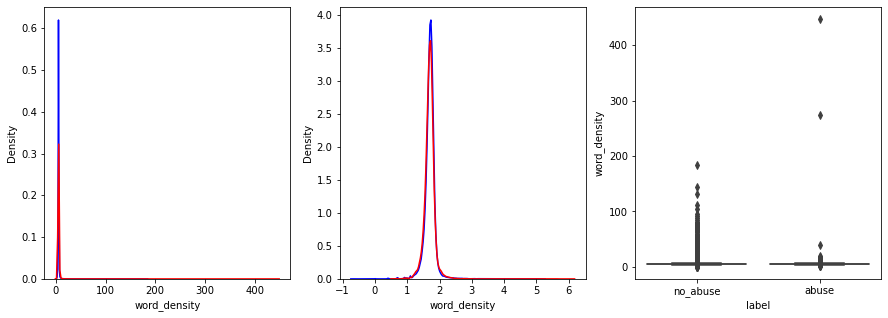

In [35]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

plt.subplot(ax[0])
sns.distplot(data.word_density[data.label == 'no_abuse'], color='b', hist=False, label='No Abuse')
# sns.displot(data=df, x='word_count', hue='label')
sns.distplot(data.word_density[data.label == 'abuse'], color='r', hist=False, label='Abuse')

plt.subplot(ax[1])
sns.distplot(np.log(data.word_density[data.label == 'no_abuse']), color='b', hist=False, label='No Abuse')
# sns.displot(data=df, x='word_count', hue='label')
sns.distplot(np.log(data.word_density[data.label == 'abuse']), color='r', hist=False, label='Abuse')
plt.xlabel("Log of word_density")

plt.subplot(ax[2])
df = data[['word_density', 'label']]
df.word_density = log(df.word_density)
sns.boxplot(x="label", y="word_density", data = data)

plt.suptitle("Word Density grouped by Target ('label')")

plt.show()

<AxesSubplot:xlabel='avg_word_len', ylabel='Density'>

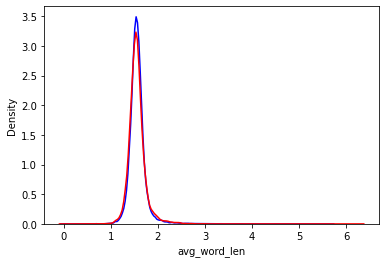

In [31]:
sns.distplot(np.log(data.avg_word_len[data.label == 'no_abuse']), color='b', hist=False, label='No Abuse')
# sns.displot(data=df, x='word_count', hue='label')
sns.distplot(np.log(data.avg_word_len[data.label == 'abuse']), color='r', hist=False, label='Abuse')

## Word Count

In [82]:
df = data[['label', 'word_count']]
df.word_count = np.log(df.word_count)

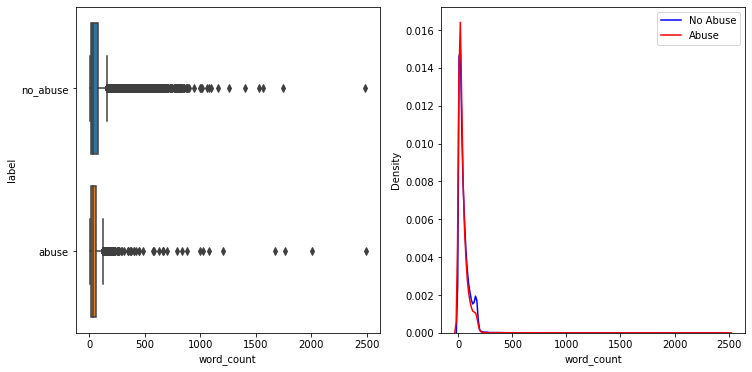

In [65]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

plt.subplot(ax[0])
sns.boxplot(y="label", x="word_count", data = df)#, data=pd.melt(grp))

plt.subplot(ax[1])
sns.distplot(df.word_count[df.label == 'no_abuse'], color='b', hist=False, label='No Abuse')
# sns.displot(data=df, x='word_count', hue='label')
sns.distplot(df.word_count[df.label == 'abuse'], color='r', hist=False, label='Abuse')
ax[1].margins(0.05, tight=False)

plt.legend()
# plt.tight_layout()
plt.show()


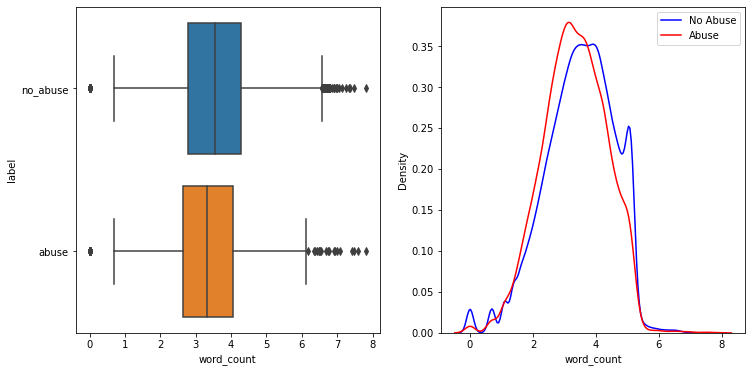

In [83]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

plt.subplot(ax[0])
sns.boxplot(y="label", x="word_count", data = df)#, data=pd.melt(grp))

plt.subplot(ax[1])
sns.distplot(df.word_count[df.label == 'no_abuse'], color='b', hist=False, label='No Abuse')
# sns.displot(data=df, x='word_count', hue='label')
sns.distplot(df.word_count[df.label == 'abuse'], color='r', hist=False, label='Abuse')
ax[1].margins(0.05, tight=False)

plt.legend()
# plt.tight_layout()
plt.show()


In [68]:
df.describe()

,word_count
count,100000.00000
mean,53.12159
std,59.81842
min,1.00000
25%,16.00000
50%,34.00000
75%,71.00000
max,2494.00000


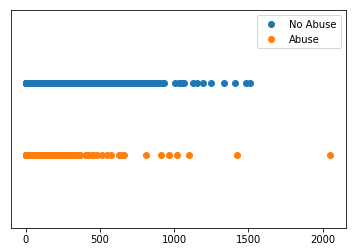

In [49]:
plt.plot(df.word_count[df.label == 'no_abuse'], np.zeros_like(df.word_count[df.label == 'no_abuse'])+0.02, 'o', label='No Abuse')
plt.plot(df.word_count[df.label == 'abuse'], np.zeros_like(df.word_count[df.label == 'abuse'])+0.01, 'o', label='Abuse')
plt.ylim(0, 0.03)
plt.yticks([])
plt.legend()

In [52]:
df.groupby('label').describe()

word_count                                                     
              count       mean        std  min   25%   50%   75%     max
label                                                                   
abuse        9308.0  44.872153  57.233906  1.0  14.0  28.0  58.0  2052.0
no_abuse    90692.0  54.045043  58.879088  1.0  16.0  35.0  73.0  1508.0

(0, 200)

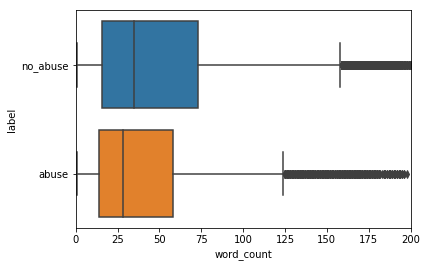

In [59]:
sns.boxplot(y="label", x="word_count", data = df)
plt.xlim(0,200)

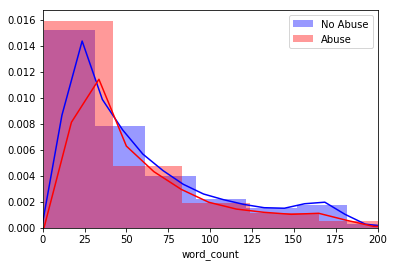

In [60]:
sns.distplot(df.word_count[df.label == 'no_abuse'], color='b', label='No Abuse')
sns.distplot(df.word_count[df.label == 'abuse'], color='r', label='Abuse')
plt.xlim(0,200)
plt.legend()

## Upper case word counts

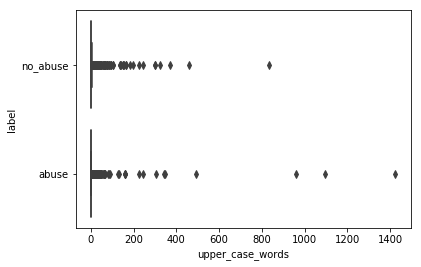

In [63]:
df = data[['label', 'upper_case_words']]

sns.boxplot(y="label", x="upper_case_words", data = df)

## Unique words count

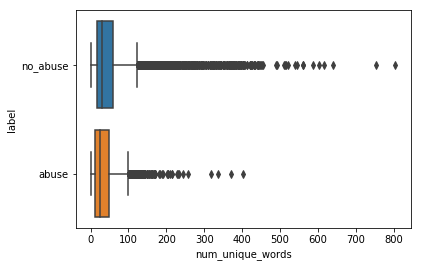

In [62]:
df = data[['label', 'num_unique_words']]

sns.boxplot(y="label", x="num_unique_words", data = df)

## Unique words ratio

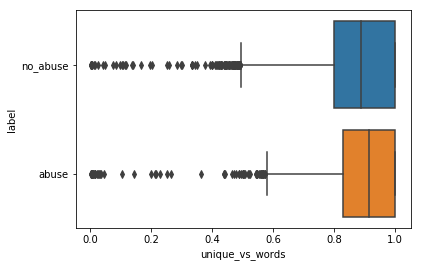

In [61]:
df = data[['label', 'unique_vs_words']] #.groupby('label')

sns.boxplot(y="label", x="unique_vs_words", data = df)#, data=pd.melt(grp))

## Be verb count

<AxesSubplot:xlabel='be_verb_count', ylabel='label'>

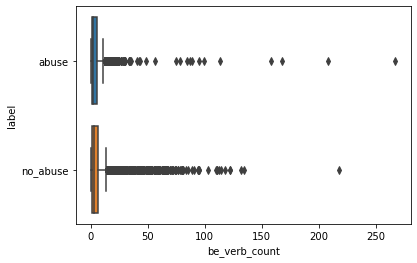

In [6]:
df = data[['label', 'be_verb_count']] #.groupby('label')

sns.boxplot(y="label", x="be_verb_count", data = df)#, data=pd.melt(grp))

In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_colwidth", 500)
# ?pd.set_option

In [4]:
data = pd.read_csv(r"../cleaned_data/train_cleaned.csv").sample(100000)

In [6]:
data.label.unique()

array(['no_abuse', 'abuse'], dtype=object)

In [7]:
data[data.label=='abuse'].head(20)

,message,label
343030,send any messages ok pricks,abuse
828181,haha mba grads are trained losers i could imagine trump saying or thinking this.,abuse
1618728,lets drive the stake through the heart of the logging industry and at the same time free abortions for all sounds like bernie won here and in a sense he did with this array of clown we have running things tighten your belts folks as it is only going to get worse.,abuse
997897,what a pile of horse doo doo check the stats the majority of shootings are conducted by black youth against black youth and it is not because they do not have the opportunities to improve their lot in life it is because they want to emulate what they see on t. big chains on their necks pants hanging below their anal opening and walking around with a big swagger.,abuse
1632231,we need another useless empty left wing statement like a hole in the head,abuse
361012,i am at home throwing up taking care of my kid yet i am a hoe oh oh okay.,abuse
1792214,this shit is fixing to blow my mind tony cannoli back in this bitch,abuse
347081,oh bullshit sullivan if it takes a train a mile to stop through this area or any other area known for problems i would say the train is traveling too fast slow the down a shole.,abuse
1861120,yes i did why would i not report it i also was with someone who reported a dog hanging from a rope around its neck from a tree in napskiack of course nothing was done i have pictures but they are to disgusting to show looks like the dog was beat before being left to hang to death.,abuse
1489976,you are as dumb as ever it was reagan who pushed the soviets to spend billions and billions on more things that all but bankrupted them so when countries like poland etc rebelled the russians had no way to enforce thier rule man take even a basic history course over your stupidity,abuse
